# Smart Waste Management
This notebook reads a CSV file containing LoRa data and performs some basic analysis.

In [20]:
# Import necessary libraries
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Load the CSV file into a DataFrame
file_path = 'influxdata_2024-05-18T06 06 36Z.csv'  # Update this with the path to your CSV file
df = pd.read_csv(file_path,skiprows=3)
df.drop(df.columns[0], axis=1, inplace=True)

In [22]:
df.columns

Index(['host', 'time', 'topic', 'value'], dtype='object')

In [23]:
# Display the first few rows of the DataFrame
df.head()

,host,time,topic,value
0,LAPTOP-8866L08J,2024-04-28T15:13:59.796648906Z,LoRa/ab/cm,49
1,LAPTOP-8866L08J,2024-04-28T15:14:07.6794388Z,LoRa/ab/cm,49
2,LAPTOP-8866L08J,2024-04-28T15:14:09.832700532Z,LoRa/ab/cm,49
3,LAPTOP-8866L08J,2024-04-28T15:14:09.832700561Z,LoRa/ab/cm,49
4,LAPTOP-8866L08J,2024-04-28T15:14:10.872860813Z,LoRa/ab/cm,49


In [24]:
# Check for any missing values
df.isnull().sum()

host     0
time     0
topic    0
value    0
dtype: int64

In [25]:
# Print the column names
print(df.columns)


Index(['host', 'time', 'topic', 'value'], dtype='object')


In [26]:
# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])
df['time']

0      2024-04-28 15:13:59.796648906+00:00
1      2024-04-28 15:14:07.679438800+00:00
2      2024-04-28 15:14:09.832700532+00:00
3      2024-04-28 15:14:09.832700561+00:00
4      2024-04-28 15:14:10.872860813+00:00
                       ...                
7073   2024-05-02 09:40:27.947178318+00:00
7074   2024-05-02 09:40:34.404146115+00:00
7075   2024-05-02 09:40:34.438229501+00:00
7076   2024-05-02 09:40:35.490694885+00:00
7077   2024-05-02 09:40:35.490707844+00:00
Name: time, Length: 7078, dtype: datetime64[ns, UTC]

In [27]:
# Set the 'time' column as the index
df.set_index('time', inplace=True)

In [28]:
df

,host,topic,value
time,,,
2024-04-28 15:13:59.796648906+00:00,LAPTOP-8866L08J,LoRa/ab/cm,49
2024-04-28 15:14:07.679438800+00:00,LAPTOP-8866L08J,LoRa/ab/cm,49
2024-04-28 15:14:09.832700532+00:00,LAPTOP-8866L08J,LoRa/ab/cm,49
2024-04-28 15:14:09.832700561+00:00,LAPTOP-8866L08J,LoRa/ab/cm,49
2024-04-28 15:14:10.872860813+00:00,LAPTOP-8866L08J,LoRa/ab/cm,49
...,...,...,...
2024-05-02 09:40:27.947178318+00:00,LAPTOP-8866L08J,LoRa/ab/cm,14
2024-05-02 09:40:34.404146115+00:00,LAPTOP-8866L08J,LoRa/ab/cm,10
2024-05-02 09:40:34.438229501+00:00,LAPTOP-8866L08J,LoRa/ab/cm,10


In [29]:
# Display summary statistics of the 'value' column
df['value'].describe()

count    7078.000000
mean       26.628850
std        13.507255
min         0.000000
25%        16.000000
50%        19.000000
75%        34.000000
max        65.000000
Name: value, dtype: float64

In [30]:
# Change the color theme
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.facecolor'] = 'lightyellow'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['figure.facecolor'] = 'lightblue'

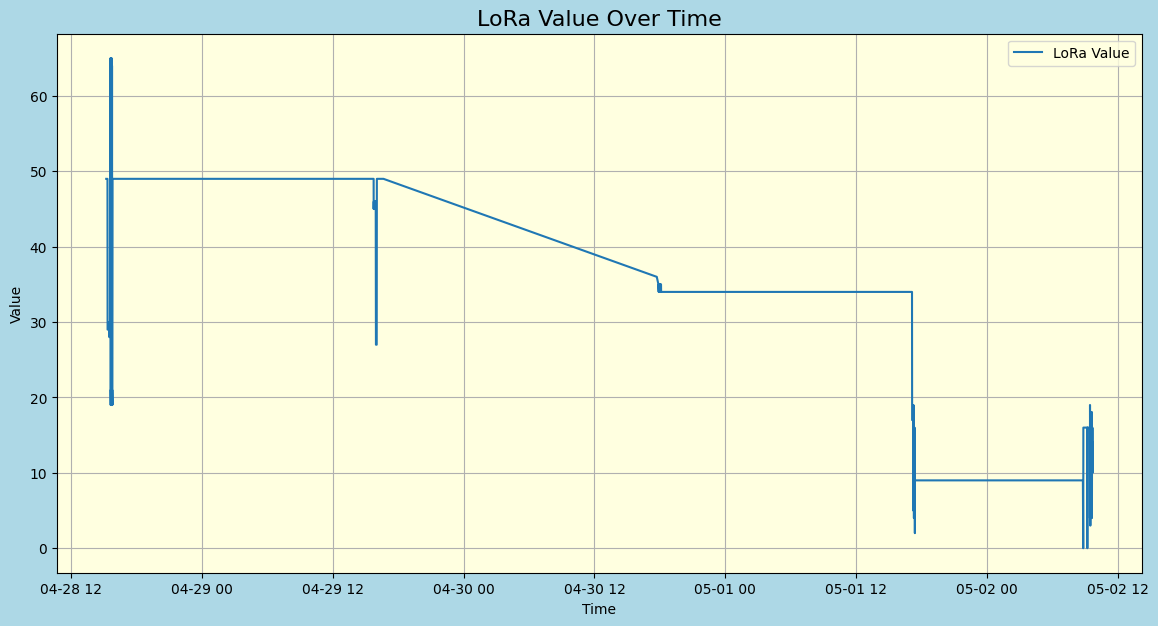

In [31]:
# Plot the 'value' column over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['value'], label='LoRa Value')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LoRa Value Over Time')
plt.legend()
plt.grid(True)
plt.show()

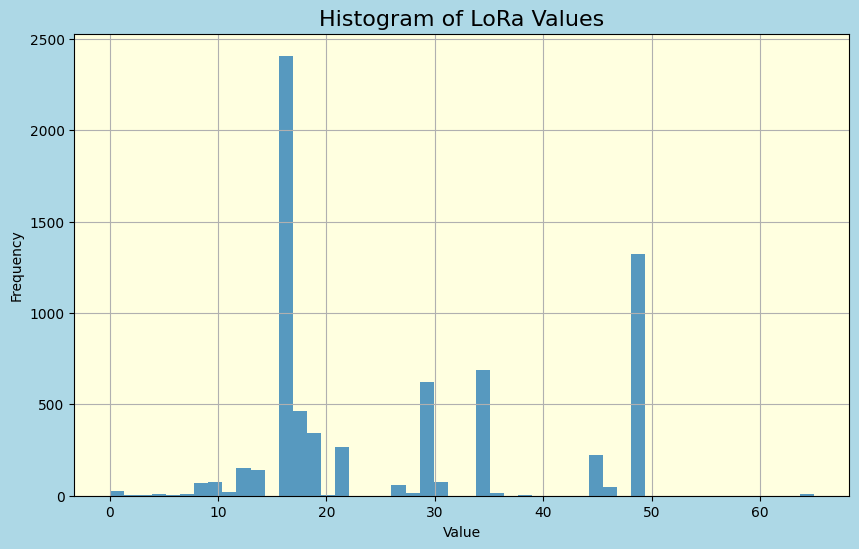

In [32]:
# Plot histogram of the 'value' column
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=50, alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of LoRa Values')
plt.grid(True)
plt.show()

In [33]:
# Anomaly detection using Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(df[['value']])

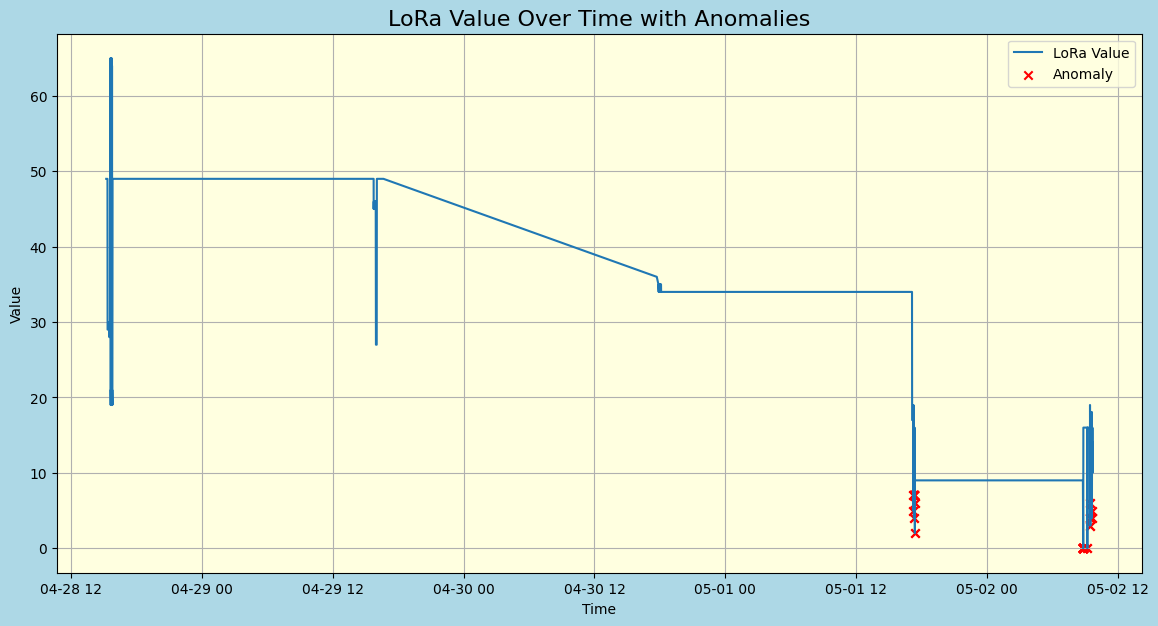

In [34]:
# Plot the anomalies
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['value'], label='LoRa Value')
plt.scatter(df[df['anomaly'] == -1].index, df[df['anomaly'] == -1]['value'],
            color='red', label='Anomaly', marker='x')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LoRa Value Over Time with Anomalies')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Time series forecasting using ARIMA
model = ARIMA(df['value'], order=(5, 1, 0))  # You can tune the order parameter based on your data
model_fit = model.fit()

c:\Users\ajayr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ajayr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ajayr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
# Forecast the next 10 steps
forecast = model_fit.forecast(steps=400)

c:\Users\ajayr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ajayr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [37]:
df

,host,topic,value,anomaly
time,,,,
2024-04-28 15:13:59.796648906+00:00,LAPTOP-8866L08J,LoRa/ab/cm,49,1
2024-04-28 15:14:07.679438800+00:00,LAPTOP-8866L08J,LoRa/ab/cm,49,1
2024-04-28 15:14:09.832700532+00:00,LAPTOP-8866L08J,LoRa/ab/cm,49,1
2024-04-28 15:14:09.832700561+00:00,LAPTOP-8866L08J,LoRa/ab/cm,49,1
2024-04-28 15:14:10.872860813+00:00,LAPTOP-8866L08J,LoRa/ab/cm,49,1
...,...,...,...,...
2024-05-02 09:40:27.947178318+00:00,LAPTOP-8866L08J,LoRa/ab/cm,14,1
2024-05-02 09:40:34.404146115+00:00,LAPTOP-8866L08J,LoRa/ab/cm,10,1
2024-05-02 09:40:34.438229501+00:00,LAPTOP-8866L08J,LoRa/ab/cm,10,1


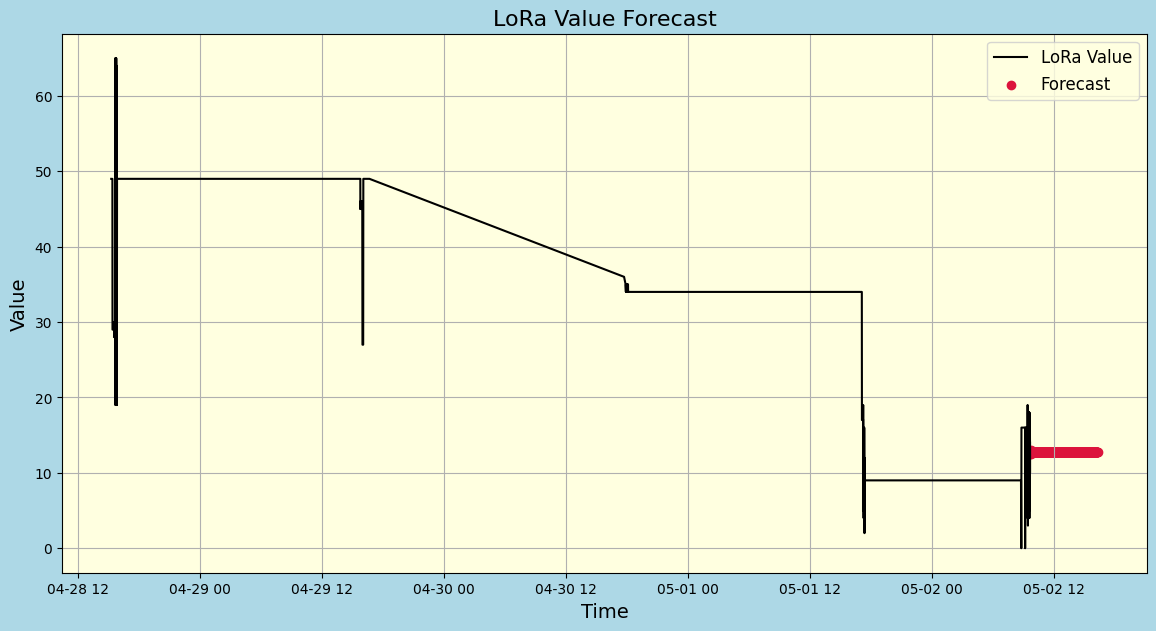

In [38]:
# Plot the original data and the forecast
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['value'], label='LoRa Value', color='black')
plt.scatter(pd.date_range(start=df.index[-1], periods=400, freq='T'), forecast, color='crimson', label='Forecast', marker='o')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('LoRa Value Forecast', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)



plt.show()